# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.115022e+01     6.975340e+00
 * time: 0.0644838809967041
     1     3.023439e+01     4.613644e+00
 * time: 0.07031488418579102
     2     2.114100e+01     4.875475e+00
 * time: 0.07760310173034668
     3     1.778619e+01     4.396633e+00
 * time: 0.08294296264648438
     4     1.124462e+01     1.866845e+00
 * time: 0.08836507797241211
     5     1.107964e+01     2.728666e+00
 * time: 0.09247088432312012
     6     1.003834e+01     1.858278e+00
 * time: 0.09659695625305176
     7     9.375998e+00     1.288024e+00
 * time: 0.10066008567810059
     8     8.959264e+00     1.530260e+00
 * time: 0.1047658920288086
     9     8.617148e+00     1.199342e+00
 * time: 0.10914492607116699
    10     8.237744e+00     9.677709e-01
 * time: 0.11335396766662598
    11     8.001129e+00     7.141015e-01
 * time: 0.11759710311889648
    12     7.892143e+00     5.423908e-01
 * time: 0.12209200859069824
    13     7.840326e+00     4.091362e-01
 * time: 0

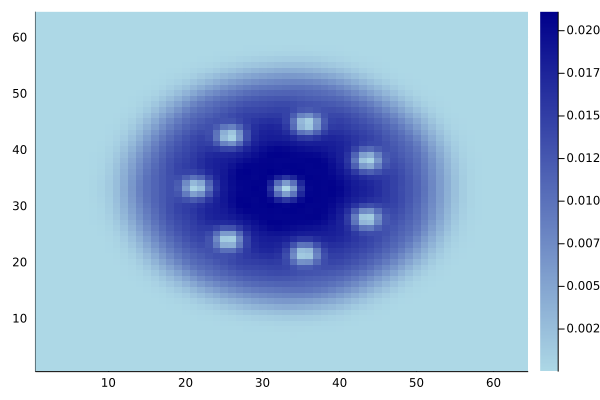

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)